[Programmingcomputervision(p.63)](http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf)  
아래 내용은 위 링크를 정리한것.

# Matching

SIFT를 이용한 이미지를 매칭하는 과정

Json을 이용한 파일 다운로드 과정 및 함수 선언과정

In [12]:
def match_twosided(desc1,desc2,threshold=0.5):
    """ Two-sided symmetric version of match()."""
    matches_12 = match(desc1,desc2,threshold)
    matches_21 = match(desc2,desc1,threshold)
    ndx_12 = where(matches_12 >= 0)[0]
    # remove matches that are not symmetric
    for n in ndx_12:
        if matches_21[matches_12[n]] != n:
            matches_12[n] = -1
    return matches_12    

In [13]:
def read_features_from_file(filename):
    """ Read feature properties and return in matrix form. """
    f = loadtxt(filename)
    return f[:,:4],f[:,4:] # feature locations, descriptors

In [19]:
import json

In [2]:
try: import simplejson as json
except ImportError: import json

google드라이브의 파일이 없는 관계로 urllib를 통해 백악관의 이미지를 다운로드 받을 수 없었다.

In [11]:
import os
import urllib
from urllib.parse import urlparse
import simplejson as json
# query for images
url = 'http://www.panoramio.com/map/get_panoramas.php?order=popularity&\
set=public&from=0&to=20&minx=-77.037564&miny=38.896662&\
maxx=-77.035564&maxy=38.898662&size=medium'
c = urllib.request.urlopen(url)
# get the urls of individual images from JSON
j = json.loads(c.read())
imurls = []
for im in j['photos']:
    imurls.append(im['photo_file_url'])
# download images
for url in imurls:
    image = urllib.URLopener()
    image.retrieve(url, os.path.basename(urlparse.urlparse(url).path))
    print('downloading: ', url)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

이전 SIFT의 에러상황과 마찬가지로 이미지 벡터 변환에서의 txt파일의 로드에 문제가 이어진다.

In [33]:
# import sift
import numpy as np
imlist = [img1, img2, img3, img3, img4, img5, img6]
nbr_images = len(imlist)

# matchscores = np.zeros((nbr_images,nbr_images))

# print(matchscores)

for i in range(nbr_images):
    for j in range(i,nbr_images): # only compute upper triangle
        print('comparing', imlist[i], imlist[j])
        
        l1,d1 = read_features_from_file(featlist[i])
        l2,d2 = read_features_from_file(featlist[j])
        
        matches = match_twosided(d1,d2)
        
        nbr_matches = sum(matches > 0)
        print('number of matches = ', nbr_matches)
        matchscores[i,j] = nbr_matches
        
# copy values
for i in range(nbr_images):
    for j in range(i+1,nbr_images): # no need to copy diagonaal
        matchscores[j,i] = matchscores[i,j]

comparing [[15 15 15 ..., 31 31 30]
 [15 15 15 ..., 27 28 28]
 [15 15 15 ..., 31 32 32]
 ..., 
 [11 11 12 ...,  9  9  7]
 [11 11 12 ...,  9  8  8]
 [11 11 11 ...,  8  8  8]] [[15 15 15 ..., 31 31 30]
 [15 15 15 ..., 27 28 28]
 [15 15 15 ..., 31 32 32]
 ..., 
 [11 11 12 ...,  9  9  7]
 [11 11 12 ...,  9  8  8]
 [11 11 11 ...,  8  8  8]]


NameError: name 'featlist' is not defined

## Opencv

위에서 발행하는 문제로 인해 차선책으로 Opencv를 이용한다.  
이미지에 Opencv의 convert('L')를 적용하여 명암을 주는 과정

In [ ]:
# 이미지 pgm 변환
def to_pgm ():
    for i in range(1, 7):
        im = Image.open('./g_class/g-class'+str(i)+'.jpg').convert('L')
        print(im)
        im.save('./g_class/gc_'+str(i)+'.pgm')     

이미지의 변환을 확인해 보기위해 작성

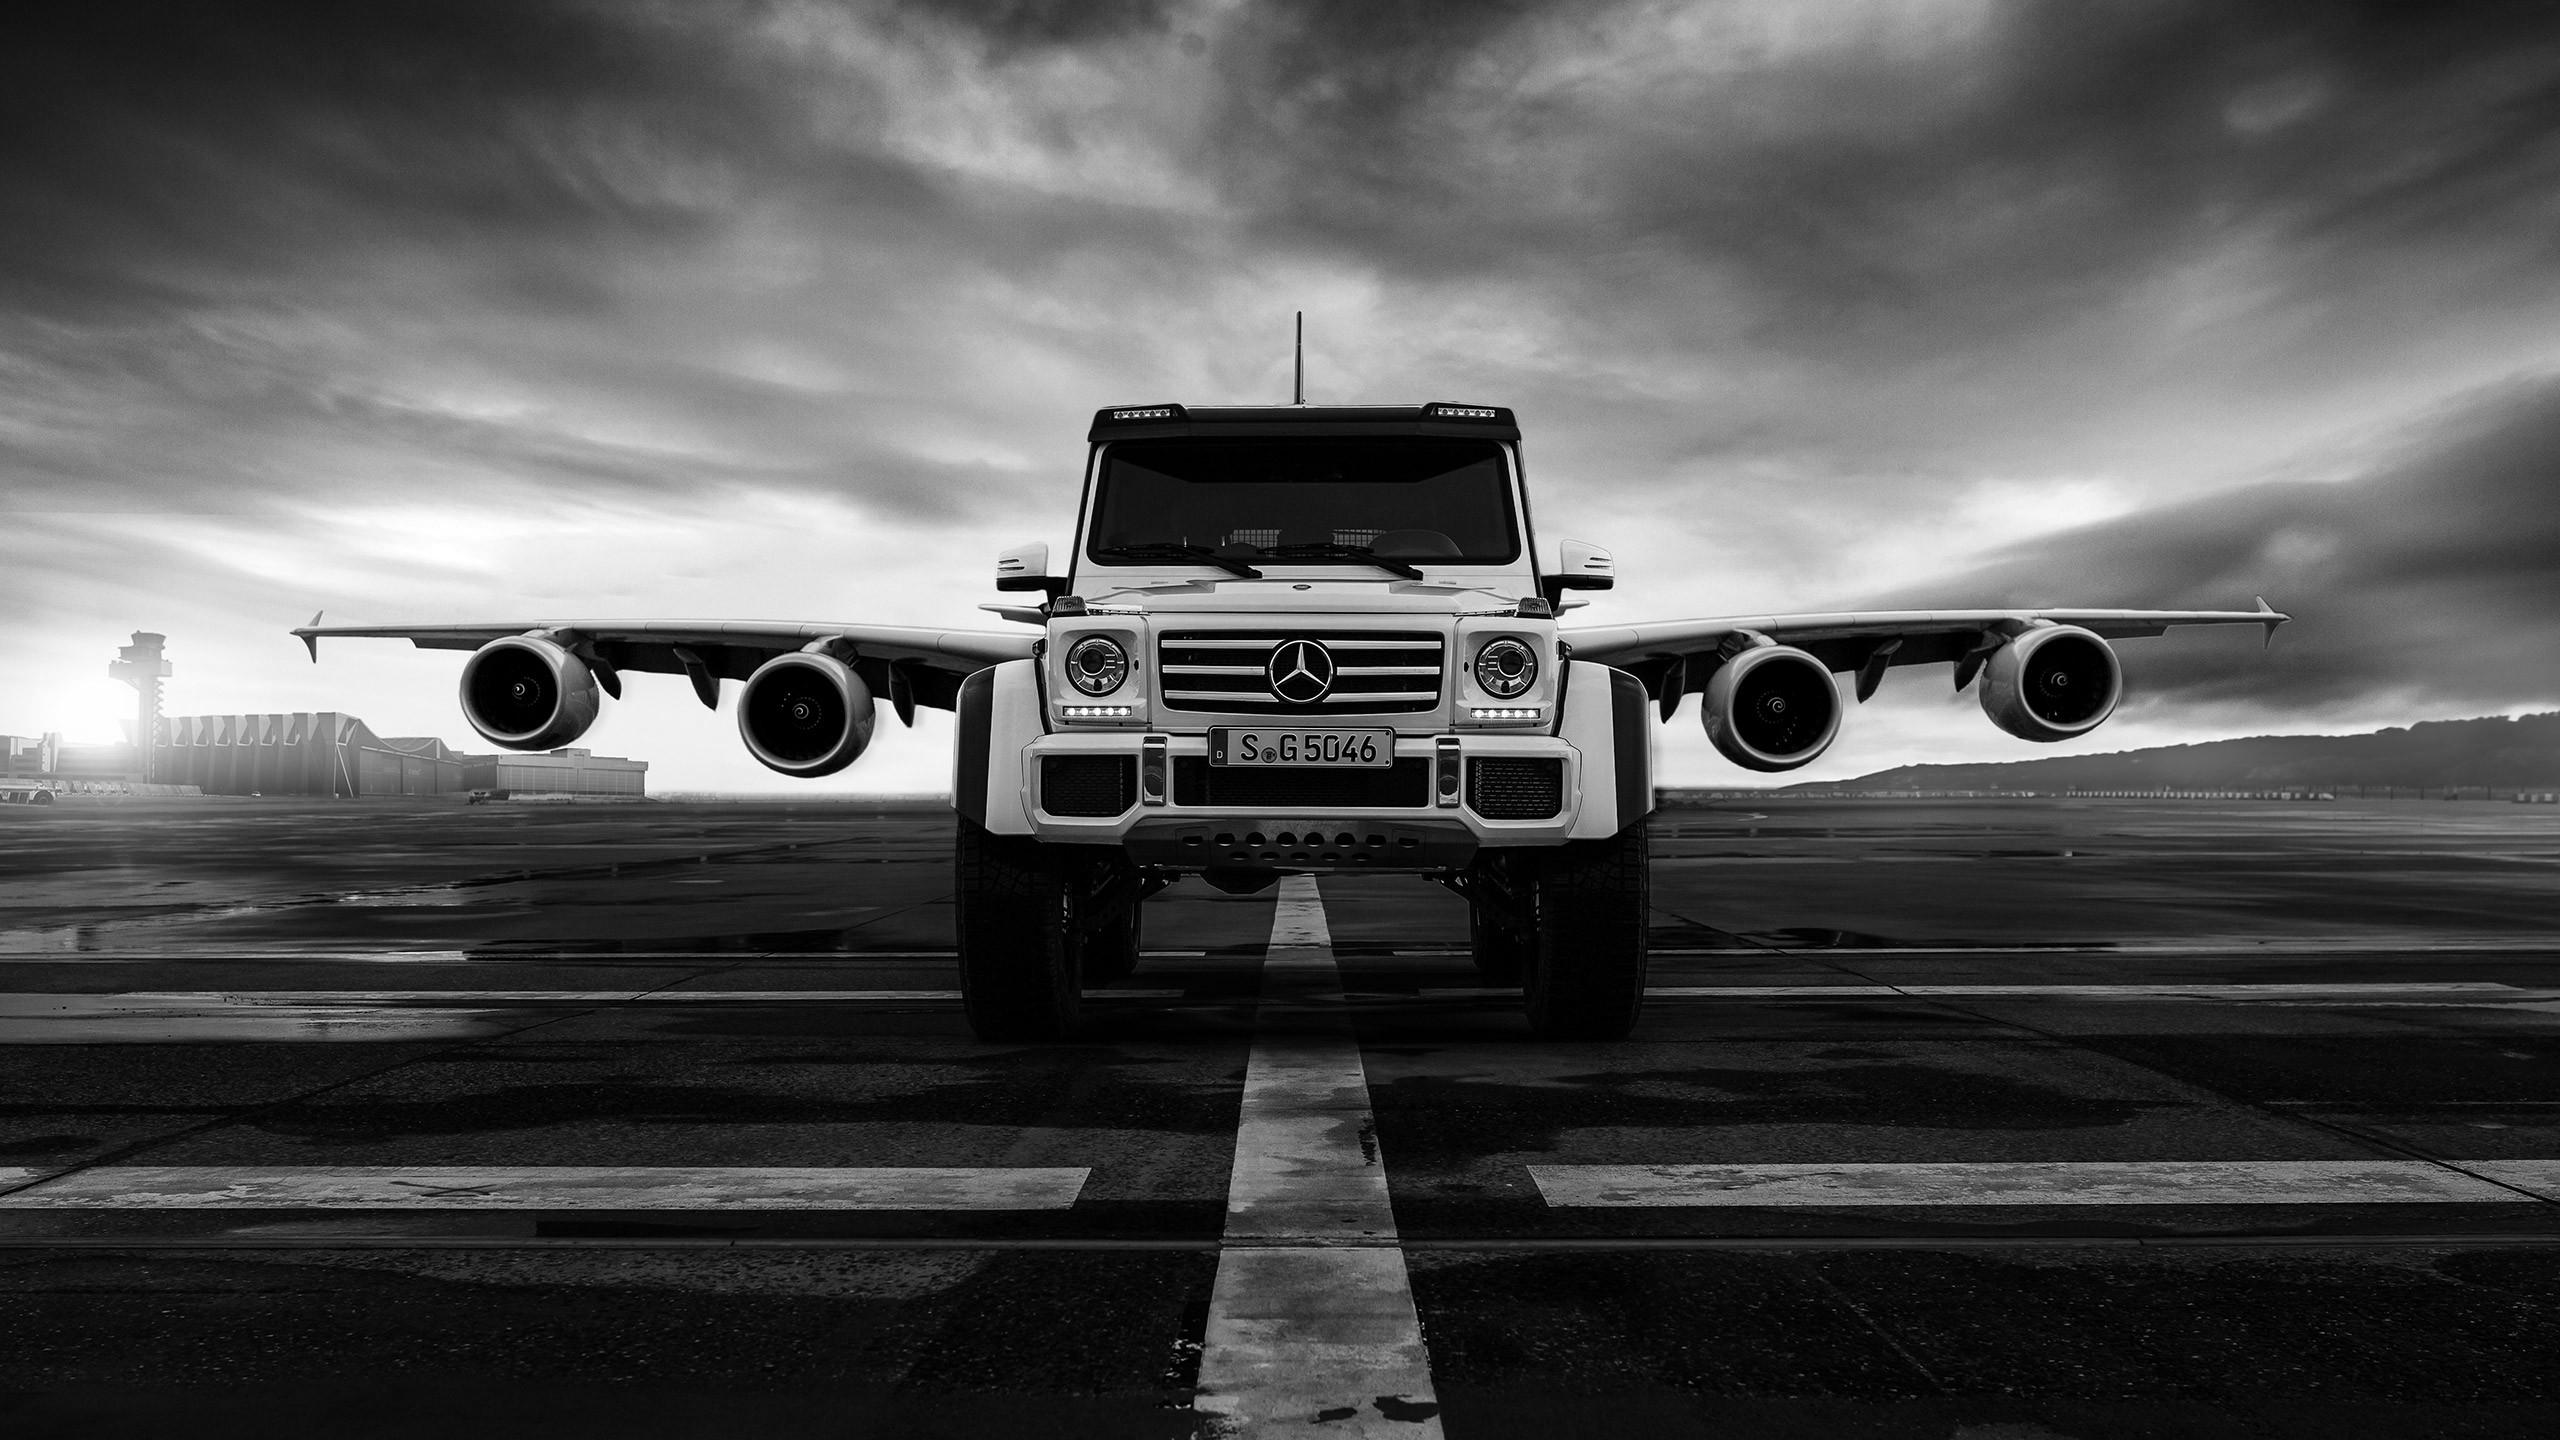

In [6]:
from PIL import Image
import cv2

g_1 = Image.open('./g_class/g-class1.jpg').convert('L')
g_2 = Image.open('./g_class/g-class2.jpg').convert('L')
# g_3 = Image.open('./g_class/g-class3.jpg').convert('L')
# g_4 = Image.open('./g_class/g-class4.jpg').convert('L')
# g_5 = Image.open('./g_class/g-class5.jpg').convert('L')
# g_6 = Image.open('./g_class/g-class6.jpg').convert('L')
g_1

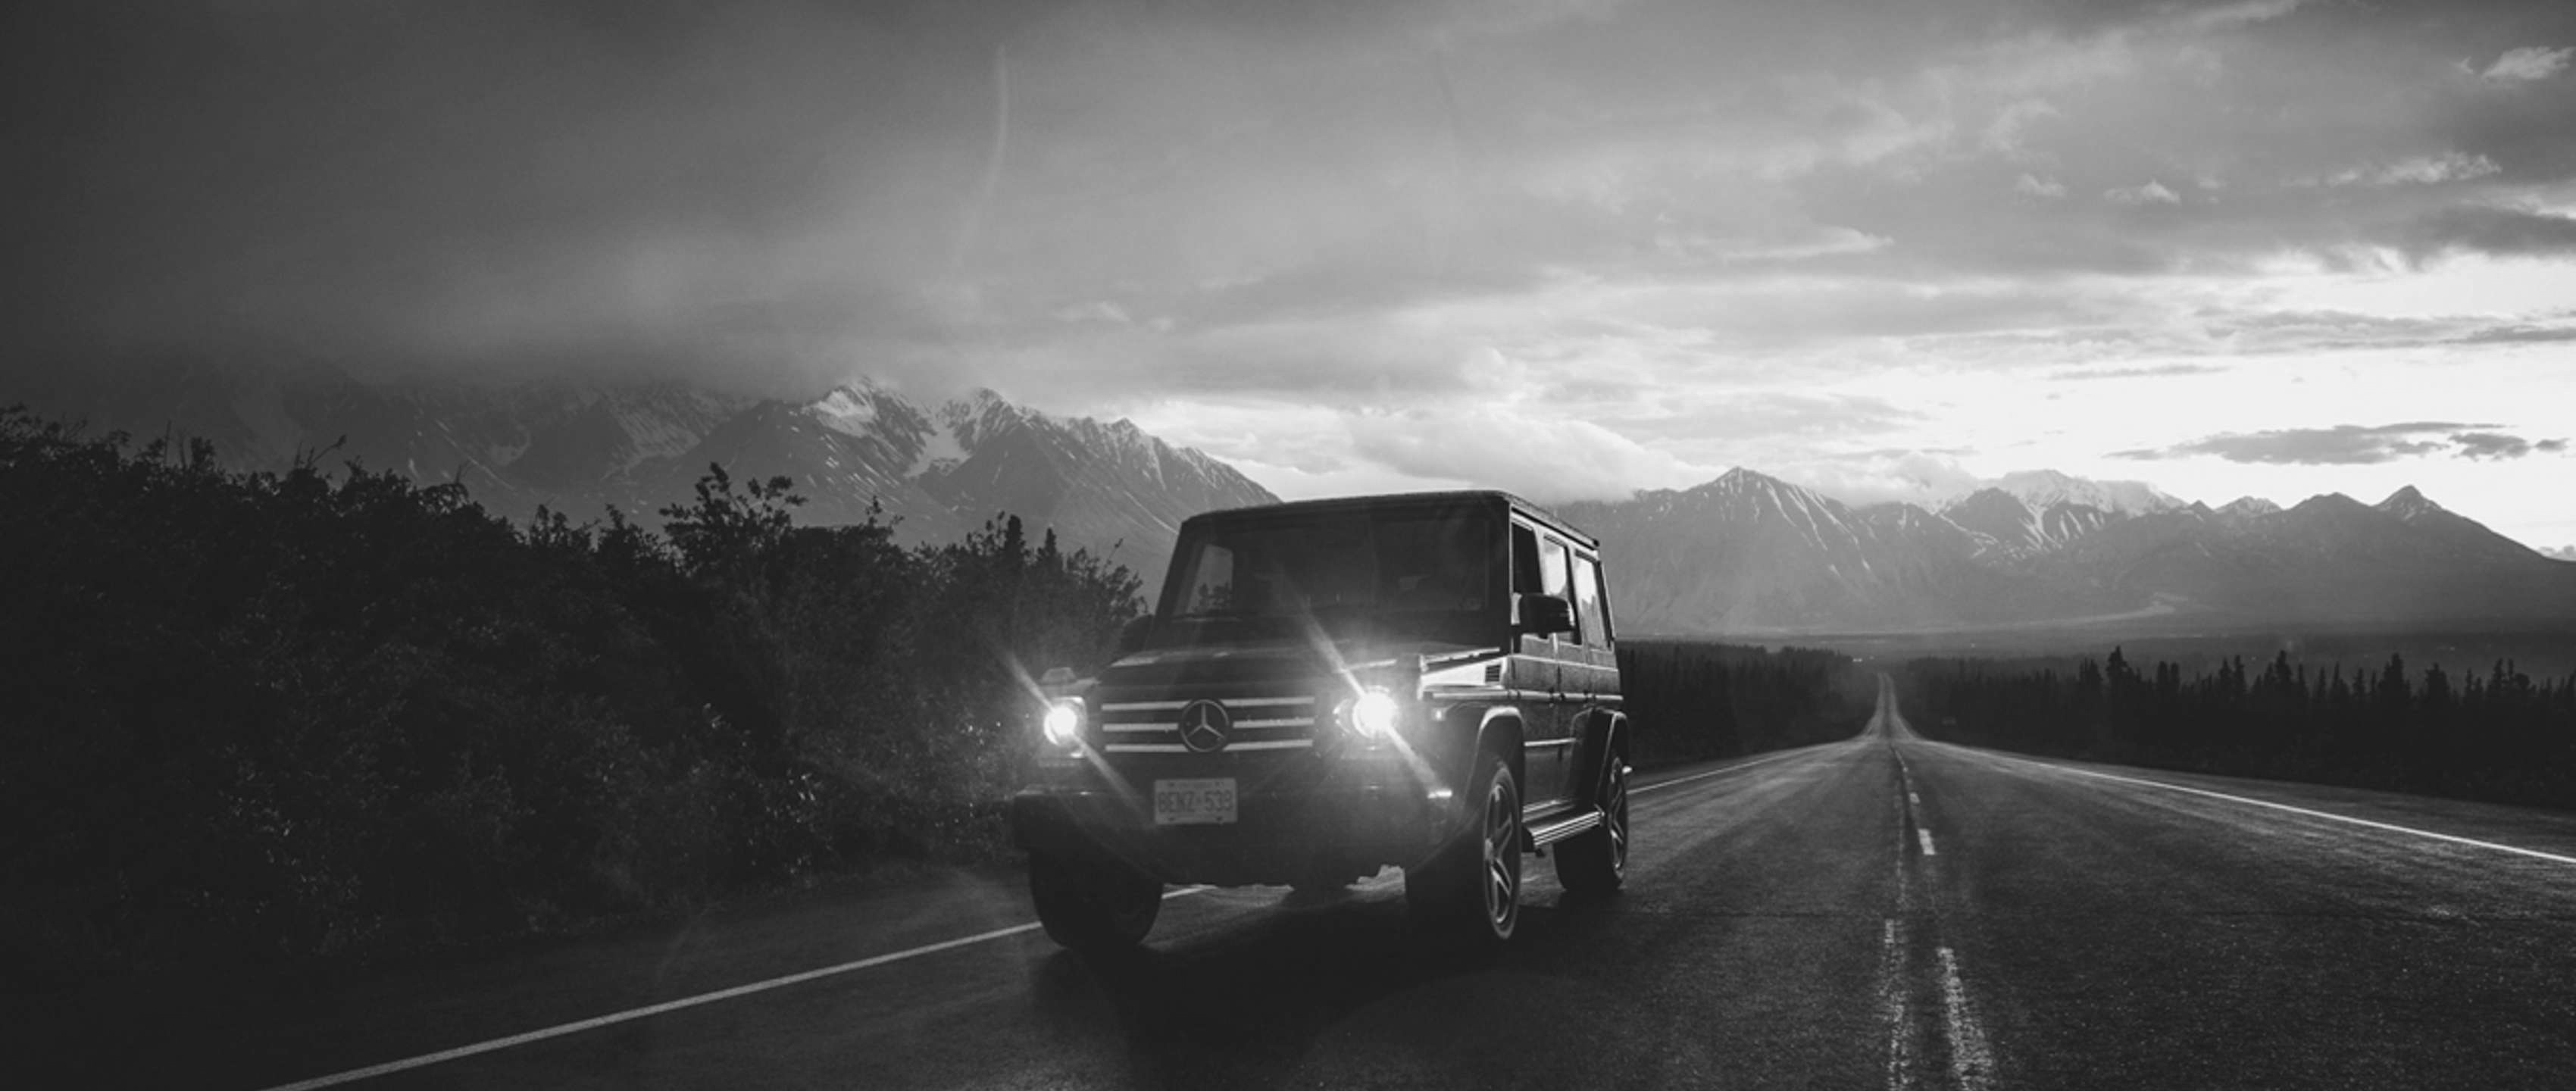

In [5]:
g_2

In [15]:
to_pgm()

<PIL.Image.Image image mode=L size=2560x1440 at 0x1CBE57589B0>
<PIL.Image.Image image mode=L size=3400x1440 at 0x1CBE49C6278>
<PIL.Image.Image image mode=L size=1180x686 at 0x1CBE5758400>
<PIL.Image.Image image mode=L size=1920x1200 at 0x1CBE49C6278>
<PIL.Image.Image image mode=L size=3400x1440 at 0x1CBE57588D0>
<PIL.Image.Image image mode=L size=1920x1440 at 0x1CBE49C6278>


변환된 이미지의 벡터화

In [18]:
img1 = cv2.imread('./g_class/gc_1.pgm',0)
img2 = cv2.imread('./g_class/gc_2.pgm',0)
img3 = cv2.imread('./g_class/gc_3.pgm',0)
img4 = cv2.imread('./g_class/gc_4.pgm',0)
img5 = cv2.imread('./g_class/gc_5.pgm',0)
img6 = cv2.imread('./g_class/gc_6.pgm',0)
print(img1)

[[15 15 15 ..., 31 31 30]
 [15 15 15 ..., 27 28 28]
 [15 15 15 ..., 31 32 32]
 ..., 
 [11 11 12 ...,  9  9  7]
 [11 11 12 ...,  9  8  8]
 [11 11 11 ...,  8  8  8]]


이미지를 특징하기 위해 Matrix 값의 대칭 대각선값 만을 남기고 0값 의 변환을 시도하였으나 모든 값이 0 되는 문제가 발생하였다.

In [20]:
# import sift
import numpy as np
imlist = [img1, img2, img3, img3, img4, img5, img6]
nbr_images = len(imlist)

matchscores = np.zeros((nbr_images,nbr_images))

print(matchscores)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


따라서 이후문제에 진행에 에러가 발생한다...

In [ ]:
for i in range(nbr_images):
    for j in range(i,nbr_images): # only compute upper triangle
        print('comparing', imlist[i], imlist[j])
        
        l1,d1 = read_features_from_file(featlist[i])
        l2,d2 = read_features_from_file(featlist[j])
        
        matches = match_twosided(d1,d2)
        
        nbr_matches = sum(matches > 0)
        print('number of matches = ', nbr_matches)
        matchscores[i,j] = nbr_matches
        
# copy values
for i in range(nbr_images):
    for j in range(i+1,nbr_images): # no need to copy diagonaal
        matchscores[j,i] = matchscores[i,j]

이후 Pydot 라이브러리를 이용하여 특징화된 이미지를 서로 구분짓는 과정이나 이전과정의 문제로 그래프화에 문제가 있다.

pydot 그래프 예제

In [16]:
import pydot
g = pydot.Dot(graph_type='graph')
g.add_node(pydot.Node(str(0),fontcolor='transparent'))
for i in range(5):
    g.add_node(pydot.Node(str(i+1)))
    g.add_edge(pydot.Edge(str(0),str(i+1)))
    for j in range(5):
        g.add_node(pydot.Node(str(j+1)+'-'+str(i+1)))
        g.add_edge(pydot.Edge(str(j+1)+'-'+str(i+1),str(j+1)))
    g.write_png('graph.jpg',prog='neato')

적용 부분

if문의 matchscores를 사용할 수 없기에 값이 나오지 못하고 있다.

In [17]:
import pydot
threshold = 2 # min number of matches needed to create link
g = pydot.Dot(graph_type='graph') # don’t want the default directed graph
for i in range(nbr_images):
    for j in range(i+1,nbr_images):
        # 값의 
        if matchscores[i,j] > threshold:
            #first image in pair
            im = Image.open(imlist[i])
            im.thumbnail((100,100))
            filename = str(i)+'.png'
            im.save(filename) # need temporary files of the right size
            g.add_node(pydot.Node(str(i),fontcolor='transparent',
            shape='rectangle',image=path+filename))

            # second image in pair
            im = Image.open(imlist[j])
            im.thumbnail((100,100))
            filename = str(j)+'.png'
            im.save(filename) # need temporary files of the right size
            g.add_node(pydot.Node(str(j),fontcolor='transparent',
                                  shape='rectangle',image=path+filename))
            
            g.add_edge(pydot.Edge(str(i),str(j)))

g.write_png('car.png')

True

이후 이론에 대해 정리하고 부족한 부분을 처리하는 과정이 필요하다.